The intended purpose of nVision is to visualize high-dimensional spaces in a reduced representation (2D/3D) and give users tools to identify patterns within their data.

In our four days, we were able to explore existing tools in `scikit-learn` such as Principle Component Analysis that address this set of problems, and made a few initial composite functions for user workflows.

The two functions we developed are

* `interaction_features` for extending datasets with nonlinear combinations of the original features and
* `pca_analysis` for an integrated pca analysis with upstream pre-processing steps

Let's say we have a 4d dataset from which we can't easily resolve subpopulations in the data:

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA, KernelPCA
from sklearn import preprocessing

In [4]:
loc = {}

loc[0] = [2.5, 1, 0, 0.75]
loc[1] = [5, 3.5, 5, 5]
loc[2] = [2.5, 4, 5, 7]
loc[3] = [5, 1, 5, 0.5]

In [5]:
rawdata = {}
pops = 4
size = 500
rawdata = np.zeros((size*pops,5))
for i in loc:
    for j, mean in enumerate(loc[i]):
        rawdata[i*500:(i+1)*500,j] = np.random.normal(loc=mean, size=500)
        rawdata[i*500:(i+1)*500,4] = i
data = pd.DataFrame(data=rawdata)

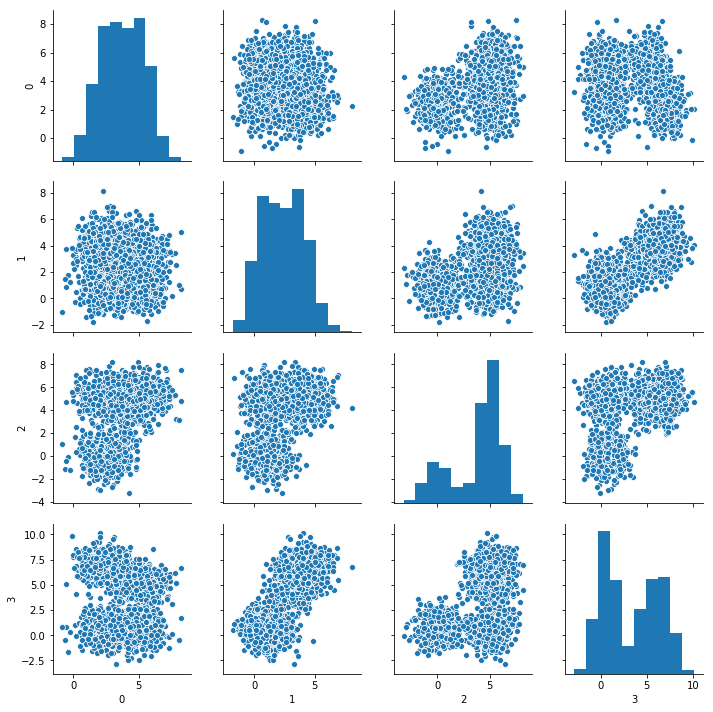

In [6]:
sns.pairplot(data.iloc[:,0:4])

In no 2d space can we easily resolve any subpopulations. A PCA analysis allows us to reduce a high-dimensional space into a lower dimensional space.

We created a simple composite function of data pre-processing steps and a pca analysis in a single function to do this:

In [42]:
from nVision import pca

newdata, model= pca_analysis(data.loc[:, 0:3])

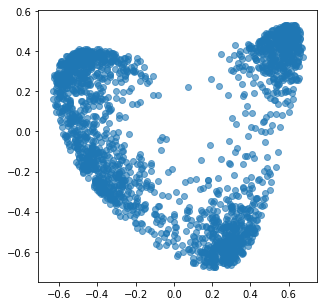

In [43]:
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(newdata[0], newdata[1], alpha=0.6)

The overall PCA workflow is able to separate out populations of interest in a reduced dimensional space. What required 4 dimensions to describe previously now requires two.

In [12]:
np.cumsum(model.explained_variance_ratio_)

array([0.52362493, 0.84595758, 0.94375083, 1.        ])

In the reduced feature space, we can use a clustering algorithm to parse out observations with similar features.

In [13]:
from sklearn.cluster import MiniBatchKMeans, KMeans
from sklearn.metrics.pairwise import pairwise_distances_argmin
from sklearn.datasets.samples_generator import make_blobs

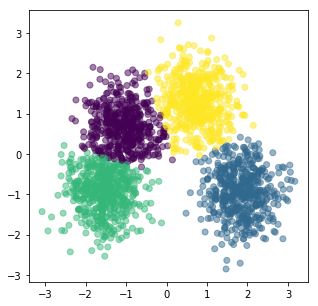

In [14]:
fig, ax = plt.subplots(figsize=(5,5))
k_means = KMeans(init='k-means++', n_clusters=4, n_init=10)
k_means.fit(newdata.iloc[:, 0:2])

ax.scatter(newdata[0], newdata[1], c=k_means.labels_, alpha=0.5)

In [41]:
def pca_analysis(data, n_components=None):

    scaler = preprocessing.StandardScaler().fit(data)

    data_s = scaler.transform(data)
    data_s = pd.DataFrame(data=data_s)

    if n_components == None:
        pca_model = KernelPCA(n_components=data_s.shape[1], kernel='rbf', degree=2)
    else:
        pca_model = KernelPCA(n_components=n_components, kernel='rbf', degree=2)

    new_data= pca_model.fit_transform(data_s)
    new_data = pd.DataFrame(data=new_data)

    return new_data, pca_model